# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

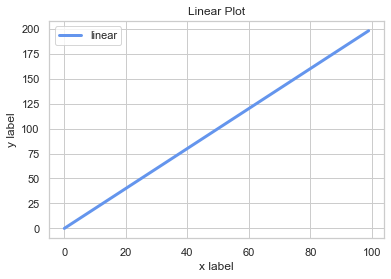

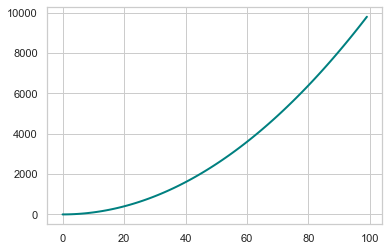

In [293]:
# Method 1
plt.plot(x, y,'cornflowerblue', label='linear',linewidth=3  )

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Linear Plot")
plt.legend()

plt.show()


plt.plot(x, z,'teal' ,label='quadratic',linewidth=2 )
plt.show()



#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

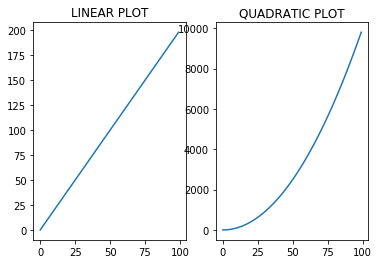

In [4]:
# Method 2
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
ax1.plot(x,y)
ax1.set_title('LINEAR PLOT')   
  

ax2.plot(x,z)
ax2.set_title('QUADRATIC PLOT')
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

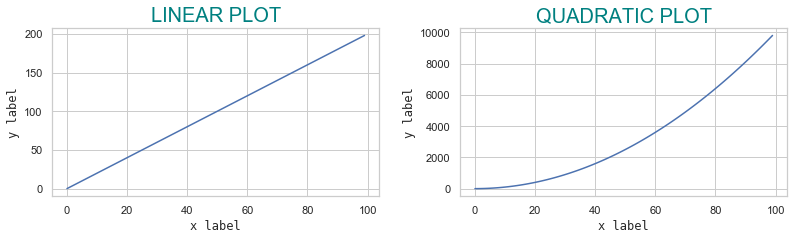

In [296]:
# Method 2
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (12,4))

fig.tight_layout(pad=4.0)

ax1.plot(x,y)

ax1.set_title('LINEAR PLOT', color = 'teal', fontsize = 20, fontweight = 'light') 
ax1.set_xlabel('x label', fontname = 'monospace')     
ax1.set_ylabel('y label', fontname = 'monospace')   

ax2.plot(x,z,)
ax2.set_title('QUADRATIC PLOT', color = 'teal', fontsize = 20)
ax2.set_xlabel('x label', fontname = 'monospace')
ax2.set_ylabel('y label', fontname = 'monospace')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

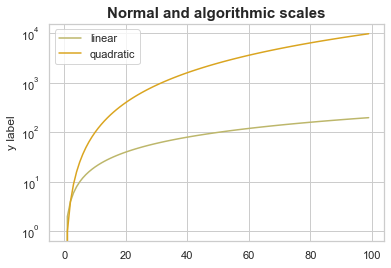

In [298]:
# your code here

plt.yscale("log")
plt.xscale("linear")
plt.ylabel('y label')
plt.title("Normal and algorithmic scales", fontsize = 15, fontweight = 'bold')

plt.plot(x, y,'darkkhaki', label='linear')
plt.plot(x, z,'goldenrod' ,label='quadratic')

plt.legend()

plt.show()


#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

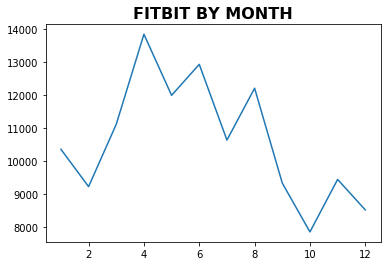

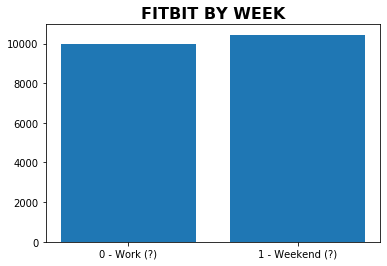

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

In [109]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
fitbit_by_month = fitbit.groupby('Months_encoded')['Steps'].median()
plt.plot(fitbit_by_month)
plt.title('FITBIT BY MONTH', fontsize = 16, fontweight ='bold')
plt.savefig('figures/fitbit_by_month.png')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit_by_week = fitbit.groupby('Work_or_Weekend')['Steps'].median()

plt.bar(fitbit_by_week.index,fitbit_by_week.values)
plt.title('FITBIT BY WEEK', fontsize = 16, fontweight ='bold')
plt.xticks(fitbit_by_week.index, ('0 - Work (?)', '1 - Weekend (?)'))
plt.savefig('figures/fitbit_by_week.png')

plt.show()

fitbit_by_week

#QUES - Couldn't undesrtand the plt.sca


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

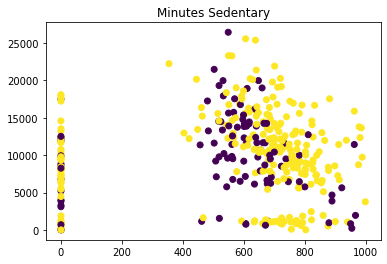

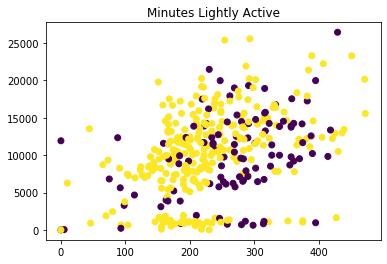

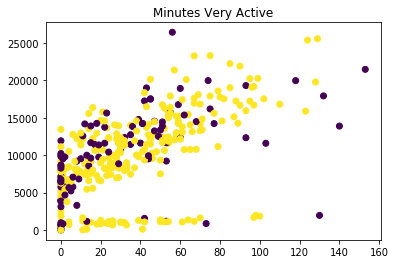

In [9]:
# your code here
cols = ['Minutes Sedentary','Minutes Lightly Active','Minutes Very Active']

for col in cols:
    plt.title(col)
    plt.scatter(fitbit[col],fitbit['Steps'],c = fitbit['Work_or_Weekend'])
    plt.savefig('figures/'+ col +'.png') 
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [162]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [100]:
# NUMERICAL VARIABLES
titanic.dtypes[np.logical_or(titanic.dtypes == 'int64', titanic.dtypes == 'float64')].index

titanic.select_dtypes(exclude="object").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [101]:
# CATEGORICAL VARIABLES
titanic.dtypes[titanic.dtypes == object].index

titanic.select_dtypes(include="object").head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [81]:
import seaborn as sns

#### Use the right visulalization to show the distribution of column `Age`.

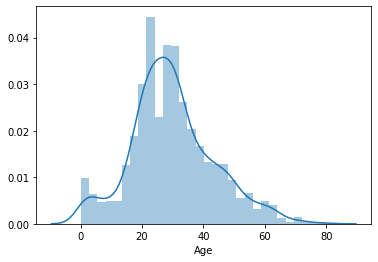

In [82]:
sns.distplot(titanic['Age']);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

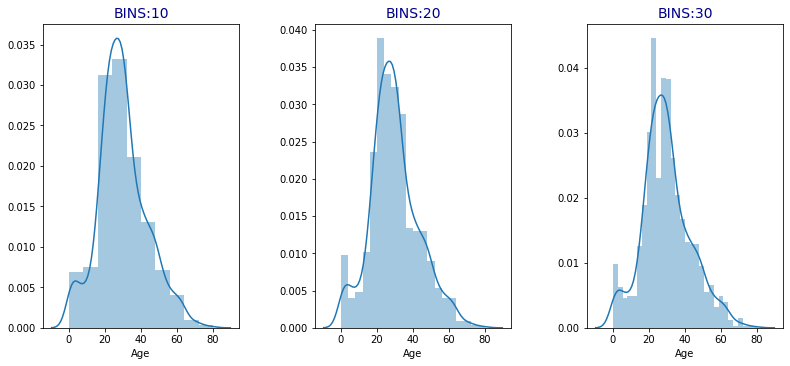

In [104]:
fig, axes = plt.subplots(ncols=3, nrows=1,figsize = (12,6))

for i,ax in zip(range(1,4), axes.flat):
    ax.set_title('BINS:'+ str(i*10), color = 'darkblue', fontsize = 14) 
    fig.tight_layout(pad=4.0)
    sns.distplot(titanic['Age'], bins = (i*10), ax =ax)
    
plt.show()

#### How does the bin size affect your plot?

In [17]:
"""
It just has more detailed information
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

In [18]:
# I was using seaborn already 🤔

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

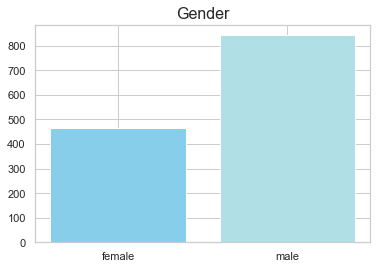

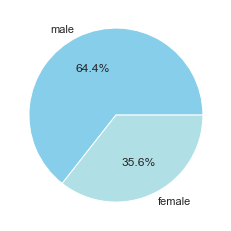

In [283]:
# Method 1 - matplotlib

colors = ['skyblue','powderblue', 'lightseagreen']
titanic_gender = titanic.groupby('Gender')['Gender'].count()

plt.bar(titanic_gender.index,titanic_gender.values, color = colors)
plt.title('Gender', fontsize = 16)
# plt.savefig('figures/titanic_gender.png')

plt.show()

plt.pie(titanic["Gender"].value_counts(),labels=titanic["Gender"].value_counts().index,autopct='%1.1f%%',colors = colors)
plt.show()


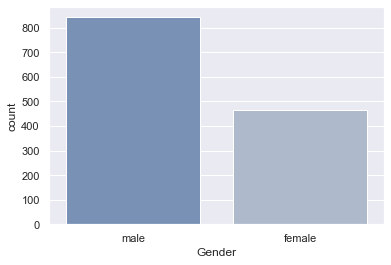

In [183]:
# Method 2 - seaborn
sns.set(palette='vlag')
sns.countplot(x=titanic["Gender"])

plt.show()

#### Use the right plot to visualize the column `Pclass`.

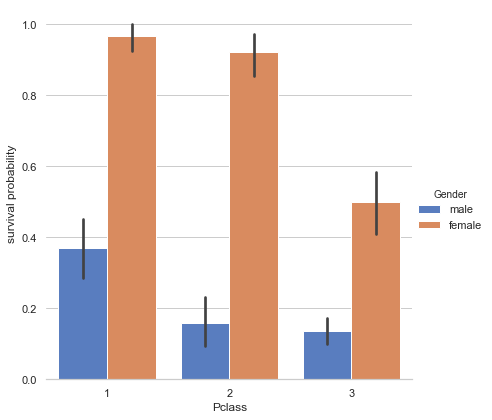

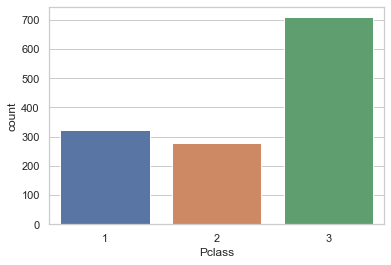

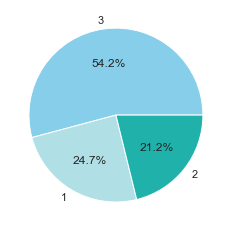

In [284]:
# Just found somthing online that looks cool

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and gender
g = sns.catplot(x="Pclass", y="Survived", hue="Gender", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

plt.show()

# The simple plot
sns.countplot(x=titanic["Pclass"])
plt.show()

plt.pie(titanic["Pclass"].value_counts(), labels =titanic["Pclass"].value_counts().index,autopct='%1.1f%%',colors =colors )
plt.show()

In [265]:
titanic["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

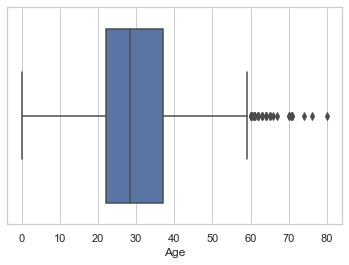

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [194]:
sns.boxplot(x=titanic["Age"])
plt.show()
titanic["Age"].describe()

In [195]:
"""
Not sure what to do here!
"""

'\nNot sure what to do here!\n'

#### What does the last plot tell you about the feature `Age`?

In [24]:
"""
Most of the people in Titanic are between 22 and 37 years old. Until almost 60 years old we have some people and then some outliers between 60 and 80 🤔
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

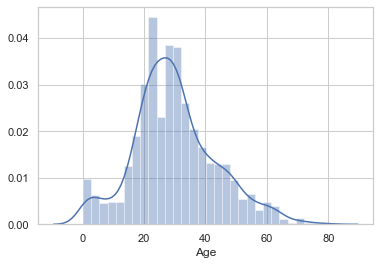

In [197]:
# your code here
sns.distplot(titanic['Age'])
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [26]:
"""
We have some group close to 30 years old that has less amount of people
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

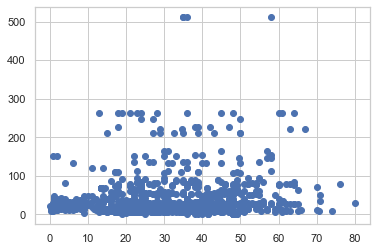

In [210]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
plt.show()


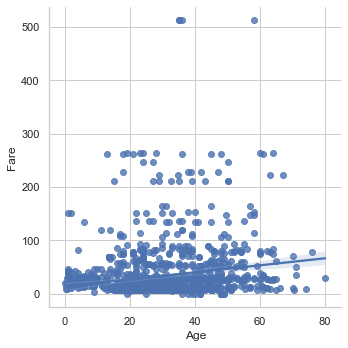

In [204]:

# Method 2 - seaborn
sns.lmplot(x="Age", y="Fare", data=titanic);
plt.show()


#### Plot the correlation matrix using seaborn.

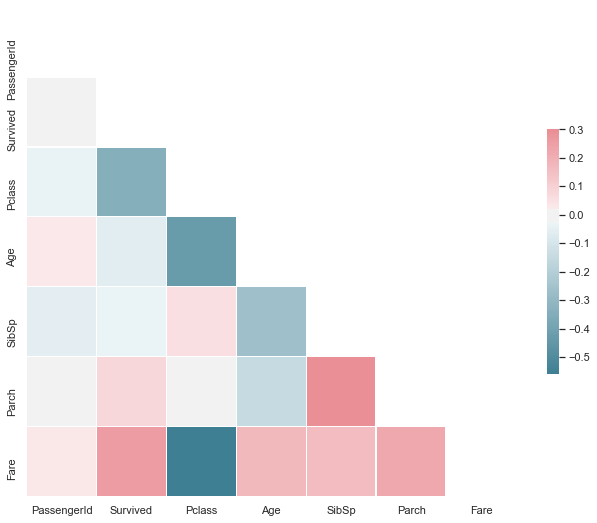

In [223]:
sns.set(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask ,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### What are the most correlated features?

In [30]:
"""
Survived and Fare
Parch and SibSp?
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

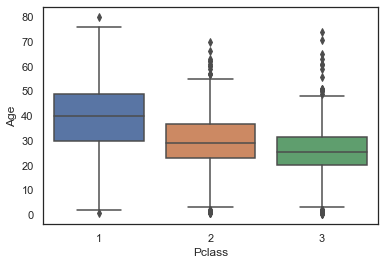

In [229]:
# sns.boxplot(x=titanic["Age"])
# plt.show()
# titanic["Age"].describe()

sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

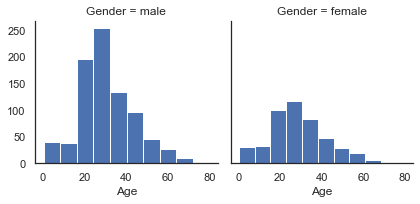

In [260]:

g = sns.FacetGrid(titanic, col="Gender")
g = g.map(plt.hist, "Age")
plt.show()

